## In this notebook, we will be guessing body fat according to parameters that we have

### First we need to import our libraries. We begin with pandas and numpy since we do only exploration for now

In [137]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import sklearn

### Read the file

In [138]:
body_fat_dataset = pd.read_csv("D:\\Projeler\\Neural_Network_With_Genetic_Algorithm\\Datasets\Body_Fat_Prediction\\bodyfat.csv")

### Let's see what we have

In [139]:
body_fat_dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### First thing noticed, our prediction metric (BodyFat) is in 2nd place, we change it to last place and look again

In [140]:
body_fat_dataset = body_fat_dataset.reindex(columns=['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
                                                    'Abdomen','Hip','Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BodyFat'])
body_fat_dataset.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


### Let's see the summary of our dataset (We will explore more deeply later)

In [141]:
summary_of_body_fat_dataset = body_fat_dataset.describe()
summary_of_body_fat_dataset

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


### We check if we have any null values for the dataset

In [142]:
if(body_fat_dataset.isnull().values.any()):
    print("Total missing value {}".format(body_fat_dataset.isnull().sum()))
    print("Missing values are ")
    print(body_fat_dataset.isnull().values.any(axis=1))
else:
    print("Dataset do not contain any missing value")

Dataset do not contain any missing value


### Let's visualize our dataset. We want to know if there is a correlation between attributes and BodyFat.
### We will find max and min values of BodyFat, and set it our boundaries

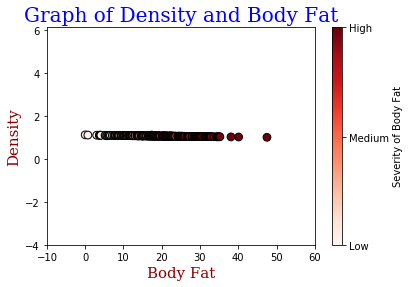

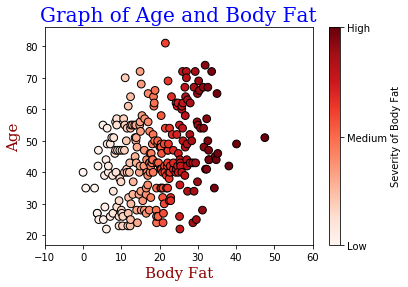

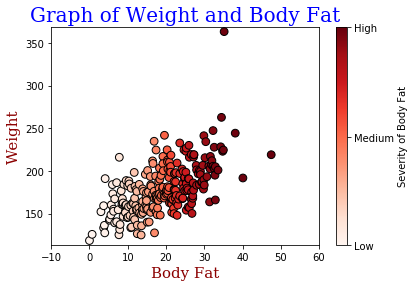

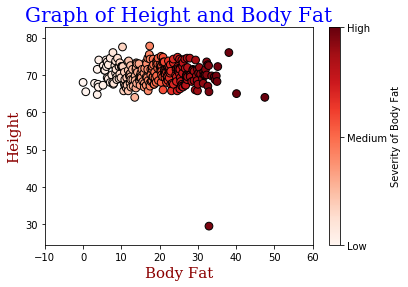

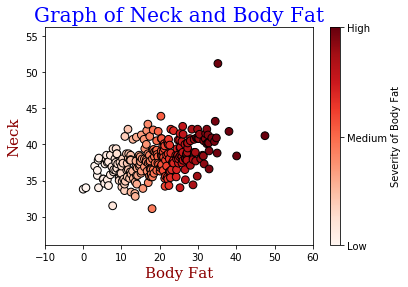

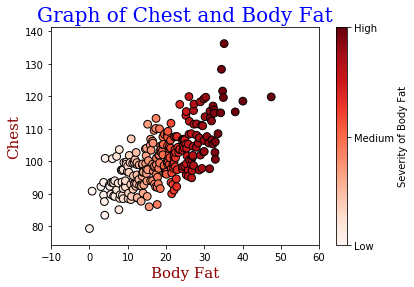

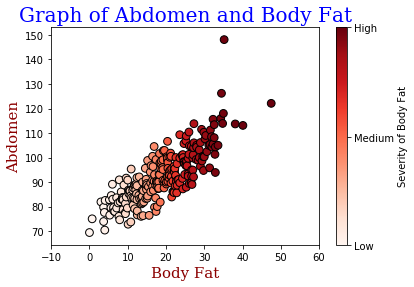

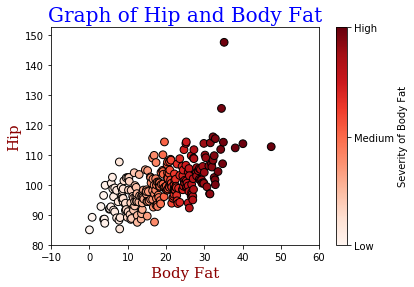

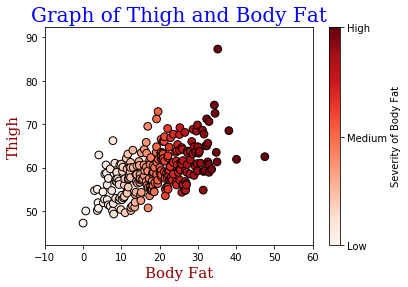

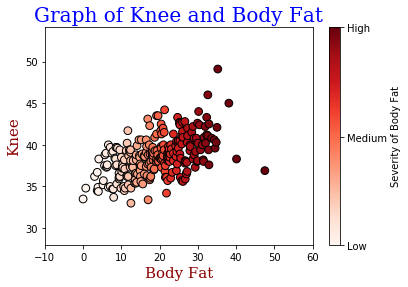

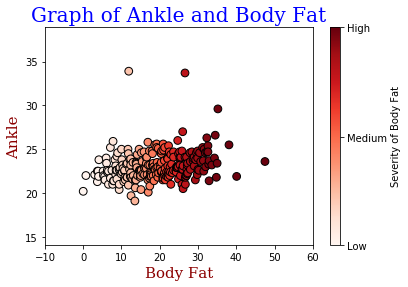

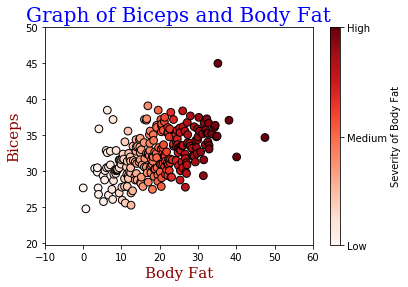

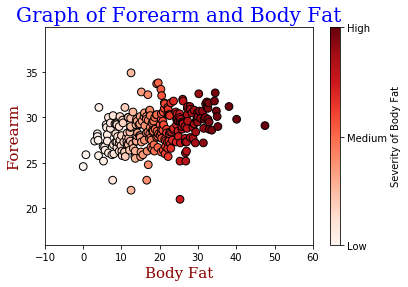

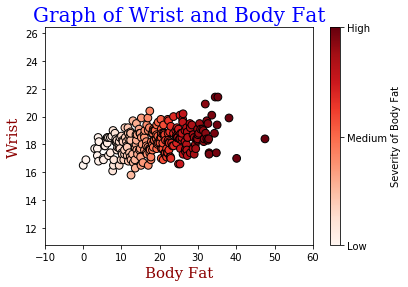

In [143]:
cm = plt.cm.get_cmap('Reds')
new_set = body_fat_dataset.sort_values(by=['BodyFat'], inplace=False)
portion = range(0,252)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

for column_name, column in body_fat_dataset.transpose().iterrows():
    
    if column_name != 'BodyFat':
        sc = plt.scatter(new_set['BodyFat'], new_set[column_name],
                    edgecolor="black",s=60,
                    vmin=0, 
                    vmax=252,
                    c=portion,
                    cmap = cm)

        plt.xlim(-10, 60)
        plt.ylim(new_set[column_name].min()-5, new_set[column_name].max()+5)

        plt.title("Graph of {} and Body Fat".format(column_name),fontdict = font1)
        plt.xlabel("Body Fat", fontdict = font2)
        plt.ylabel("{}".format(column_name), fontdict = font2)


        cbar=plt.colorbar()   
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.set_ticks([0,125,252])
        cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])
        cbar.set_label('Severity of Body Fat')
        plt.savefig('{}-{}.png'.format(format(column_name),'BodyFat'))
        plt.show()
        

## We will look for correlation between BodyFat and other columns

In [144]:
correlation_frame = pd.DataFrame(columns=['Attribute_Name','Pearson','Kendall','Spearman'])
for column_name, column in body_fat_dataset.transpose().iterrows():
    if column_name != 'BodyFat':
        data = body_fat_dataset[['{}'.format(column_name),'BodyFat']]
        correlation_Pearson = data.corr(method='pearson')
        correlation_Kendall = data.corr(method='kendall')
        correlation_Spearman = data.corr(method='spearman')
        record = {  'Attribute_Name':column_name,
                    'Pearson':correlation_Pearson.iloc[0][1],
                    'Kendall':correlation_Kendall.iloc[0][1],
                    'Spearman':correlation_Spearman.iloc[0][1],
                  
                 }
        correlation_frame = correlation_frame.append(record,ignore_index=True)

### We will sort correlations for each method

In [145]:
correlation_frame_sorted_by_Pearson = (correlation_frame.sort_values(by=['Pearson'], inplace=False,ascending=False)).reset_index(drop=True)
correlation_frame_sorted_by_Kendall = (correlation_frame.sort_values(by=['Kendall'], inplace=False,ascending=False)).reset_index(drop=True)
correlation_frame_sorted_by_Spearman = (correlation_frame.sort_values(by=['Spearman'], inplace=False,ascending=False)).reset_index(drop=True)

## If we do not select the most correlated features

In [167]:
x = body_fat_dataset.loc[:, 'Density':'Wrist'].copy()
y = body_fat_dataset.loc[:,'BodyFat'].copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LinearRegression(normalize=True).fit(X_train, y_train)


y_pred = model.predict(X_test)
d = {'Predicted': y_pred, 'Actual': y_test}
frame = pd.DataFrame(data=d)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)





0.8087431235489102


## We will do simple regression, we will enhance further. We will begin with Pearson Correlations

In [168]:
print(correlation_frame_sorted_by_Pearson[correlation_frame_sorted_by_Pearson.Pearson > 0.5])

  Attribute_Name   Pearson   Kendall  Spearman
0        Abdomen  0.813432  0.621092  0.816248
1          Chest  0.702620  0.487716  0.673999
2            Hip  0.625201  0.439443  0.612125
3         Weight  0.612414  0.435767  0.612869
4          Thigh  0.559608  0.385434  0.544957
5           Knee  0.508665  0.344729  0.489285


## So we select, Abdomen, Chest, Hip, Weight, Thigh, Knee

In [176]:
body_fat_dataset_features_selected = body_fat_dataset[
    ["Abdomen", "Chest", "Hip","Weight","Thigh","Knee", "BodyFat"]]
x = body_fat_dataset_features_selected.loc[:, 'Abdomen':'Knee'].copy()
y = body_fat_dataset_features_selected.loc[:,'BodyFat'].copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)



model = LinearRegression(normalize=True).fit(X_train, y_train)

y_pred = model.predict(X_test)
d = {'Predicted': y_pred, 'Actual': y_test}
frame = pd.DataFrame(data=d)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)



4.526005548089862


## Now we look for Kendall correlation

In [177]:
print(correlation_frame_sorted_by_Kendall[correlation_frame_sorted_by_Kendall.Kendall > 0.5])

  Attribute_Name   Pearson   Kendall  Spearman
0        Abdomen  0.813432  0.621092  0.816248


In [160]:
body_fat_dataset_features_selected = body_fat_dataset[['Abdomen','BodyFat']]

body_fat_dataset_features_selected.columns


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)



model = LinearRegression(normalize=True).fit(X_train, y_train)

y_pred = model.predict(X_test)
d = {'Predicted': y_pred, 'Actual': y_test}
frame = pd.DataFrame(data=d)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

4.512144835601602


## Now we look for Spearman Correlation

In [151]:
print(correlation_frame_sorted_by_Spearman[correlation_frame_sorted_by_Spearman.Spearman > 0.5])

  Attribute_Name   Pearson   Kendall  Spearman
0        Abdomen  0.813432  0.621092  0.816248
1          Chest  0.702620  0.487716  0.673999
2         Weight  0.612414  0.435767  0.612869
3            Hip  0.625201  0.439443  0.612125
4          Thigh  0.559608  0.385434  0.544957


In [155]:
body_fat_dataset_features_selected = body_fat_dataset[["Abdomen", "Chest","Hip","Weight","Thigh", "BodyFat"]]
x = body_fat_dataset_features_selected.loc[:, 'Abdomen':'Thigh'].copy()
y = body_fat_dataset_features_selected.loc[:,'BodyFat'].copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LinearRegression(normalize=True).fit(X_train, y_train)

y_pred = model.predict(X_test)
d = {'Predicted': y_pred, 'Actual': y_test}
frame = pd.DataFrame(data=d)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)


17.03219298405861
4.127007751877698
